In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 
from glob import glob 
from pathlib import Path 
import numpy as np 
from fastcore.xtras import load_pickle
from scipy.stats import sem

from gptchem.evaluator import find_learning_curve_intersection, fit_learning_curve, lc
from gptchem.plotsettings import *
from gptchem.settings import (
    ONE_COL_GOLDEN_RATIO_HEIGHT_INCH,
    ONE_COL_WIDTH_INCH,
    TWO_COL_GOLDEN_RATIO_HEIGHT_INCH,
)

from gptchem.representation import smiles_to_canoncial

%matplotlib inline

In [3]:
all_res = glob("results_balanced/*.pkl")

In [4]:
train_data = pd.read_csv("../../02_multirep/esol_data.csv")

In [5]:
all_cm_res = []
all_confident_res = []

for res in all_res:
    res = load_pickle(res)
    cm_all = res["cm_all"]
    cm_confident = res["cm_confident"]

    cm_all["num_classes"] = res["num_classes"]
    cm_all["num_train_points"] = min(res["num_train_points"], len(train_data))
    cm_all["representation"] = ", ".join(res["representation"])
    cm_all['num_reps'] = len(res["representation"])

    cm_confident["num_classes"] = res["num_classes"]
    cm_confident["num_train_points"] = min(res["num_train_points"], len(train_data))
    cm_confident["representation"] = ", ".join(res["representation"])
    cm_confident["frac_confident"] = sum(res["confident"]) / res["test_len"]
    cm_confident['num_reps'] = len(res["representation"])
    
    all_cm_res.append(cm_all)
    all_confident_res.append(cm_confident)

In [6]:
all_cm_res = pd.DataFrame(all_cm_res)
all_confident_res = pd.DataFrame(all_confident_res)

In [7]:
all_cm_res_grouped = (
    all_cm_res[
        [
            "num_classes",
            "representation",
            "num_train_points",
            "accuracy",
            "kappa",
            "f1_macro",
            "f1_micro",
            "num_reps"
        ]
    ]
    .groupby(["num_classes", "representation", "num_train_points"])
    .agg(["mean", "std", sem])
)
all_confident_res_grouped = (
    all_confident_res[
        [
            "num_classes",
            "representation",
            "num_train_points",
            "frac_confident",
            "accuracy",
            "kappa",
            "f1_macro",
            "f1_micro",
            "num_reps"
        ]
    ]
    .groupby(["num_classes", "representation", "num_train_points"])
    .agg(["mean", "std", sem])
)

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(

In [8]:
all_cm_res_grouped

accuracy  \
                                                                                     mean   
num_classes representation                                     num_train_points             
2           canonical                                          10                0.803571   
            selfies, canonical                                 10                0.821429   
                                                               50                0.839286   
                                                               500               0.875000   
                                                               1000              0.857143   
            selfies, deepsmiles, canonical                     10                0.830357   
                                                               50                0.821429   
                                                               500               0.839286   
            selfies, deepsmiles, canonical, inchi, tucan       10                0.803571   
                                                               50                0.803571   
                                                               200               0.821429   
                                                               500               0.821429   
                                                               1081              0.803571   
            selfies, deepsmiles, canonical, inchi, tucan, i... 10                0.830189   
                                                               50                0.867925   
                                                               200               0.849057   
                                                               500               0.830189   
                                                               1081              0.849057   
5           canonical                                          10                0.357143   
                                                               50                0.401786   
                                                               100               0.357143   
                                                               200               0.357143   
                                                               500               0.357143   
            selfies, canonical                                 10                0.473214   
                                                               50                0.410714   
                                                               100               0.392857   
                                                               200               0.428571   
            selfies, deepsmiles, canonical                     10                0.437500   
                                                               50                0.357143   
                                                               100               0.428571   
                                                               200               0.357143   
            selfies, deepsmiles, canonical, inchi, tucan       10                0.392857   
                                                               50                0.357143   
                                                               100               0.428571   
                                                               200               0.392857   
            selfies, deepsmiles, canonical, inchi, tucan, i... 10                0.509434   
                                                               50                0.377358   
                                                               100               0.433962   

                                                                                           \
                                                                                      std   
num_classes representation                                     num_train_points  

In [9]:
all_confident_res_grouped

frac_confident  \
                                                                                          mean   
num_classes representation                                     num_train_points                  
2           canonical                                          10                     1.000000   
            selfies, canonical                                 10                     0.910714   
                                                               50                     0.857143   
                                                               500                    0.875000   
                                                               1000                   0.875000   
            selfies, deepsmiles, canonical                     10                     0.857143   
                                                               50                     0.857143   
                                                               500                    0.857143   
            selfies, deepsmiles, canonical, inchi, tucan       10                     0.821429   
                                                               50                     0.785714   
                                                               200                    0.750000   
                                                               500                    0.803571   
                                                               1081                   0.767857   
            selfies, deepsmiles, canonical, inchi, tucan, i... 10                     0.571429   
                                                               50                     0.642857   
                                                               200                    0.660714   
                                                               500                    0.642857   
                                                               1081                   0.660714   
5           canonical                                          10                     1.000000   
                                                               50                     1.000000   
                                                               100                    1.000000   
                                                               200                    1.000000   
                                                               500                    1.000000   
            selfies, canonical                                 10                     0.714286   
                                                               50                     0.669643   
                                                               100                    0.732143   
                                                               200                    0.696429   
            selfies, deepsmiles, canonical                     10                     0.544643   
                                                               50                     0.535714   
                                                               100                    0.589286   
                                                               200                    0.500000   
            selfies, deepsmiles, canonical, inchi, tucan       10                     0.241071   
                                                               50                     0.250000   
                                                               100                    0.303571   
                                                               200                    0.196429   
            selfies, deepsmiles, canonical, inchi, tucan, i... 10                     0.017857   
                                                               50                     0.071429   
                                                               100                    0.071429   

                                                             

In [10]:
esol_results = pd.read_pickle('../../../03_classification/solubility/grouped_res.pkl')

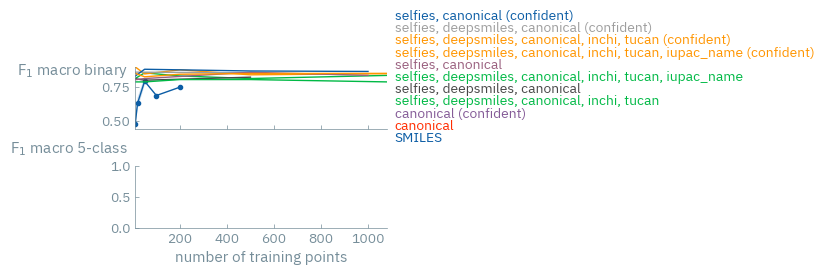

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(ONE_COL_WIDTH_INCH, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex=True)

metric = 'f1_macro'

ax[0].plot(esol_results.loc[2, 'SMILES'].index, esol_results.loc[2, 'SMILES'][metric]['mean'], label='SMILES', marker='o')
ax[0].fill_between(esol_results.loc[2, 'SMILES'].index, 
                   esol_results.loc[2, 'SMILES'][metric]['mean'] - esol_results.loc[2, 'SMILES'][metric]['sem'], esol_results.loc[2, 'SMILES'][metric]['mean'] + esol_results.loc[2, 'SMILES'][metric]['sem'], alpha=0.2)

for reps in all_cm_res['representation'].unique(): 
    subset = all_cm_res_grouped.loc[2, reps]
    subset_confident = all_confident_res_grouped.loc[2, reps]
    ax[0].plot(subset.index, subset[metric]['mean'], label=reps)
    ax[0].fill_between(subset.index, subset[metric]['mean'] - subset[metric]['sem'], subset[metric]['mean'] + subset[metric]['sem'], alpha=0.2)

    ax[0].plot(subset_confident.index, subset_confident[metric]['mean'], label=reps + " (confident)")
    ax[0].fill_between(subset_confident.index, subset_confident[metric]['mean'] - subset_confident[metric]['sem'], subset_confident[metric]['mean'] + subset_confident[metric]['sem'], alpha=0.2)




matplotx.line_labels(ax[0])


ylabel_top(r'F$_1$ macro binary', ax[0])
ylabel_top(r'F$_1$ macro 5-class', ax[1])

plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)

ax[-1].set_xlabel('number of training points')

fig.savefig('multirep_esol_lc.pdf', bbox_inches='tight')